# 4.10 Coding Etiquette and Excel Reporting Part 1

# 1 Import libraries

#  2 import data

# 3 PII - Data Privacy

# 4 Create Regions

# 5 Compare Regions

# 6 Customer Profiles

# 7 Visualizations

# 8 Agg Customer Profiles

# 9 Export data

In [1]:
#1 Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
path= r'C:\Users\sdow\Desktop\Instacart Basket Analysis'

In [2]:
#2 Import data
ords_prods_cust_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merge_v2.pkl'))

In [3]:
#3 PII Data Privacy
##Removing PII and unnecessary columns
ords_prods_cust = ords_prods_cust_merge.drop(columns = ['Unnamed: 0_x', 'Unnamed: 0_y', 'first_name', 'last_name'])
## PII has now been removed

In [4]:
ords_prods_cust.head()

product_id                product_name  aisle_id  department_id     prices  \
0           1  Chocolate Sandwich Cookies        61             19   5.800781   
1           1  Chocolate Sandwich Cookies        61             19   5.800781   
2         907        Premium Sliced Bacon       106             12  20.000000   
3         907        Premium Sliced Bacon       106             12  20.000000   
4        1000                    Apricots        18             10  12.898438   

   order_id customer_id  order_number  orders_day_of_week  order_hour_of_day  \
0   3139998         138            28                   6                 11   
1   1977647         138            30                   6                 17   
2   3160996         138             1                   5                 13   
3   2254091         138            10                   5                 14   
4    505689         138             9                   6                 12   

   ...  spending_flag  frequency_order     frequency_flag Gender      state  \
0  ...    Low spender              8.0  Frequent Customer   Male  Minnesota   
1  ...    Low spender              8.0  Frequent Customer   Male  Minnesota   
2  ...    Low spender              8.0  Frequent Customer   Male  Minnesota   
3  ...    Low spender              8.0  Frequent Customer   Male  Minnesota   
4  ...    Low spender              8.0  Frequent Customer   Male  Minnesota   

  age date_joined number_of_dependents  marital_status income  
0  81    8/1/2019                    1         married  49620  
1  81    8/1/2019                    1         married  49620  
2  81    8/1/2019                    1         married  49620  
3  81    8/1/2019                    1         married  49620  
4  81    8/1/2019                    1         married  49620  

[5 rows x 31 columns]

In [5]:
#3 Create regions
region_northeast = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']
region_midwest = ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
region_south = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky', 'Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
region_west = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']


In [6]:
#5 Compare Regions
ords_prods_cust.loc[ords_prods_cust['state'].isin(region_northeast), 'region' ] = 'Northeast'
ords_prods_cust.loc[ords_prods_cust['state'].isin(region_midwest), 'region' ] = 'Midwest'
ords_prods_cust.loc[ords_prods_cust['state'].isin(region_south), 'region' ] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'].isin(region_west), 'region' ] = 'West'
ords_prods_cust['region'].value_counts(dropna = False)

South        10801610
West          8300445
Midwest       7603810
Northeast     5728347
Name: region, dtype: int64

In [14]:
#5 Compare regions compare high and low spending by region
crosstab_regional = pd.crosstab(ords_prods_cust['region'], ords_prods_cust['spending_flag'], normalize = True, dropna = False)
crosstab_regional

spending_flag  High spender  Low spender
region                                  
Midwest            0.004814     0.229624
Northeast          0.003340     0.173274
South              0.006480     0.326551
West               0.004958     0.250958

##5 The south has the highest volume of high spendors, and the highest volume of low spendors.  In rank order of highest spendors South, West, Midwest and Northeast.  In rank order of low spendors is South, West, Midwest, and Northeast.

In [7]:
#6 Create Customer profiles
## create a flag for customers with less than 5 orders
ords_prods_cust.loc[ords_prods_cust['max_order'] < 5 , 'more_than_5_orders' ] = 0
ords_prods_cust.loc[ords_prods_cust['max_order'] >= 5, 'more_than_5_orders'] = 1

In [9]:
## check 
ords_prods_cust['more_than_5_orders'].value_counts()

1.0    30992664
0.0     1441548
Name: more_than_5_orders, dtype: int64

In [15]:
### create df more than 5 and less than 5 for orders
ords_morethan5 = ords_prods_cust.loc[ords_prods_cust['more_than_5_orders'] == 1]
ords_lessthan5 = ords_prods_cust.loc[ords_prods_cust['more_than_5_orders'] == 0]

In [16]:
### checking values
ords_morethan5['more_than_5_orders'].value_counts()

1.0    30992664
Name: more_than_5_orders, dtype: int64

In [21]:
#### Defining profile criteria
#### Income flag  - upper, middle and lower income in US https://www.investopedia.com/financial-edge/0912/which-income-class-are-you.aspx#:~:text=The%20Pew%20Research%20Center%20defines,make%20between%20%2443%2C350%20and%20%24130%2C000.
    # < 43350 = lower
    # >=43350 , < 130000 = middle
    # >= 130000 = upper
#### parent flag = number of dependents > 0
#### Adult age flag -Defining Adults https://academic.oup.com/gerontologist/article/42/1/92/641498
    # >=18 and <=35 = young_adult
    # >=36 and <= 55 = middle_adult
    # >=56 = older_adult
#### Department id flags
    # pet 8 
    # bulk 10
    # babies 18

In [18]:
#### Income flag
ords_morethan5.loc[ords_morethan5['income'] < 43350, 'economic_class'] = 'lower'
ords_morethan5.loc[ (ords_morethan5['income'] >= 43350) & (ords_morethan5['income'] < 130000), 'economic_class'] = 'middle'
ords_morethan5.loc[ords_morethan5['income'] >= 130000, 'economic_class'] = 'upper'

C:\Users\sdow\AppData\Local\Temp\ipykernel_23300\3008031905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_morethan5.loc[ords_morethan5['income'] < 43350, 'economic_class'] = 'lower'


In [19]:
#### Parent flag
ords_morethan5.loc[ords_morethan5['number_of_dependents'] > 0, 'parent'] = 'parent'
ords_morethan5.loc[ords_morethan5['number_of_dependents'] == 0, 'parent'] = 'non_parent'

C:\Users\sdow\AppData\Local\Temp\ipykernel_23300\924627454.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_morethan5.loc[ords_morethan5['number_of_dependents'] > 0, 'parent'] = 'parent'


In [20]:
#### Adult age flag
ords_morethan5.loc[(ords_morethan5['age'] >= 18) & (ords_morethan5['age'] <=35), 'age_group'] = 'young adult'
ords_morethan5.loc[ (ords_morethan5['age'] >= 36) & (ords_morethan5['age'] <=55), 'age_group'] = 'middle_aged'
ords_morethan5.loc[ords_morethan5['age'] >= 56 , 'age_group'] = 'senior'

C:\Users\sdow\AppData\Local\Temp\ipykernel_23300\1184843450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_morethan5.loc[(ords_morethan5['age'] >= 18) & (ords_morethan5['age'] <=35), 'age_group'] = 'young adult'


In [22]:
#### Department Flags
    # 8 pets
    # 10 bulk (potential large families)
    # 18 babies
ords_morethan5.loc[ords_morethan5['department_id'] == 8, 'pets_flag'] = 1
ords_morethan5.loc[ords_morethan5['department_id'] != 8, 'pets_flag'] = 0
ords_morethan5.loc[ords_morethan5['department_id'] == 10, 'bulk_flag'] = 1
ords_morethan5.loc[ords_morethan5['department_id'] != 10, 'bulk_flag'] = 0
ords_morethan5.loc[ords_morethan5['department_id'] == 18, 'baby_flag'] = 1
ords_morethan5.loc[ords_morethan5['department_id'] != 18, 'baby_flag'] = 0

C:\Users\sdow\AppData\Local\Temp\ipykernel_23300\2864633356.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_morethan5.loc[ords_morethan5['department_id'] == 8, 'pets_flag'] = 1
C:\Users\sdow\AppData\Local\Temp\ipykernel_23300\2864633356.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_morethan5.loc[ords_morethan5['department_id'] == 10, 'bulk_flag'] = 1
C:\Users\sdow\AppData\Local\Temp\ipykernel_23300\2864633356.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [16]:
ords_morethan5['parent'].value_counts()

parent        23245632
non_parent     7747032
Name: parent, dtype: int64

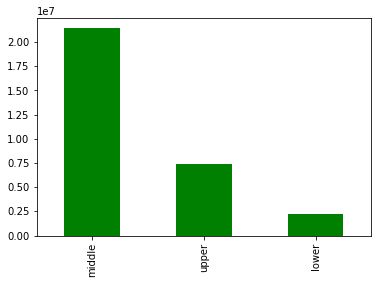

In [57]:
#8 Visualizations
#Income - economic class visualization
income_bar = ords_morethan5['economic_class'].value_counts().plot.bar(color = ['g'])

In [58]:
income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_bar.png'))

In [39]:
crosstabregionclass  = pd.crosstab(ords_morethan5['region'], ords_morethan5['economic_class'], dropna = False)

In [40]:
crosstabregionclass

economic_class   lower   middle    upper
region                                  
Midwest         496763  5006475  1764469
Northeast       391444  3768416  1310208
South           736743  7138921  2444798
West            551419  5494642  1888366

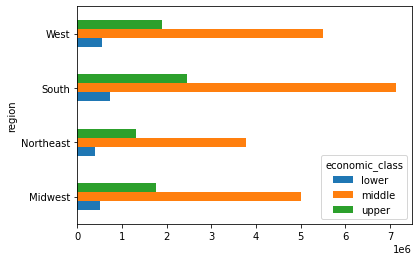

In [41]:
region_class_bar = crosstabregionclass.plot.barh()

In [59]:
region_class_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_class_bar.png'))

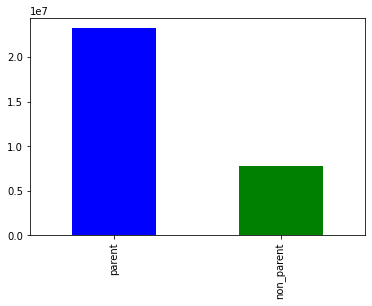

In [62]:
#Parents
parents_bar = ords_morethan5['parent'].value_counts().plot.bar(color = ['b','g'])

In [63]:
parents_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'parents_bar.png'))

In [64]:
crosstabparentregion  = pd.crosstab(ords_morethan5['region'], ords_morethan5['parent'], dropna = False)

In [65]:
crosstabparentregion

parent     non_parent   parent
region                        
Midwest       1824487  5443220
Northeast     1355828  4114240
South         2584352  7736110
West          1982365  5952062

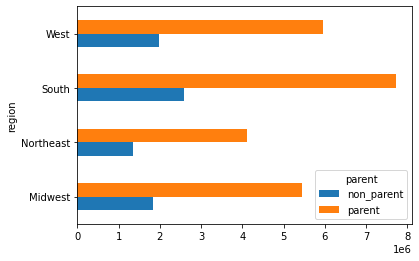

In [66]:
region_parent_bar = crosstabparentregion.plot.barh()

In [67]:
region_parent_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_parent_bar.png'))

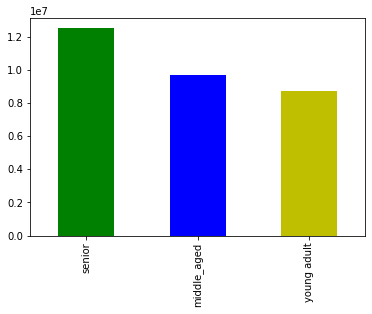

In [68]:
#Age
age_group_bar = ords_morethan5['age_group'].value_counts().plot.bar(color = ['g','b','y'])

In [69]:
age_group_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_bar.png'))

In [70]:
crosstabageregion  = pd.crosstab(ords_morethan5['region'], ords_morethan5['age_group'], dropna = False)

In [75]:
crosstabageregion

age_group  middle_aged   senior  young adult
region                                      
Midwest        2330937  2916573      2020197
Northeast      1680905  2236090      1553073
South          3214960  4152367      2953135
West           2499447  3214606      2220374

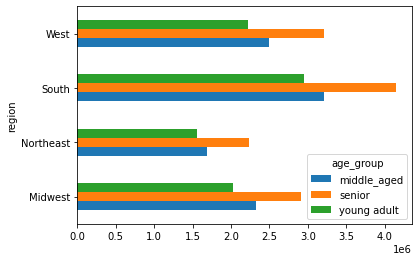

In [72]:
age_region_bar = crosstabageregion.plot.barh()

In [73]:
age_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_region_bar.png'))

In [76]:
#8 agg max, mean, min for profile level usage
#age group
#economic class
#Parents

In [77]:
#age group
ords_morethan5.groupby('age_group').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                              mean  min   max
age_group                                    
middle_aged              10.804688  0.0  30.0
senior                   10.804688  0.0  30.0
young adult              10.828125  0.0  30.0

In [78]:
ords_morethan5.groupby('age_group').agg({'mean_order': ['mean', 'min', 'max']})

mean_order                      
                  mean     min           max
age_group                                   
middle_aged  11.799691  1.0000  15006.940000
senior       11.933939  1.2625  14042.512281
young adult  12.085154  1.0000  10209.987755

In [51]:
#parents
ords_morethan5.groupby('parent').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                             mean  min   max
parent                                      
non_parent              10.789062  0.0  30.0
parent                  10.820312  0.0  30.0

In [79]:
ords_morethan5.groupby('parent').agg({'mean_order': ['mean', 'min', 'max']})

mean_order                   
                 mean  min           max
parent                                  
non_parent  12.103485  1.0  15006.940000
parent      11.878163  1.0  10209.987755

In [80]:
#age group
ords_morethan5.groupby('age_group').agg({'order_hour_of_day': ['mean', 'min', 'max']})


order_hour_of_day        
                         mean min max
age_group                            
middle_aged         13.423233   0  23
senior              13.414076   0  23
young adult          13.39237   0  23

In [81]:
#9 Exporting Data
ords_morethan5.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'insta_final.pkl')) 